#Libraries

In [123]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import sklearn.linear_model as skl_lm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation



#Defining Functions

In [47]:
#This function drops columns which have object type datatypes
def dtype_drop(data):
    for col in data.columns:
        if data[col].dtype=='object':
            data.drop(col,inplace=True,axis=1)
        else:
            pass
        
#Filing the NaN values with mean 
def fill_values(data):
    for col in data.columns:
        if data[col].dtype=='float64':
            data[col][np.isnan(data[col])] = data[col].mean()
        else:
            pass

#Data

In [102]:
bnp_train=pd.read_csv('../data/train.csv')
bnp_test=pd.read_csv('../data/test.csv')

bnp_train.info()
print '-----------------------------'
bnp_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.9+ MB
-----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 114393 entries, 0 to 114392
Columns: 132 entries, ID to v131
dtypes: float64(108), int64(5), object(19)
memory usage: 116.1+ MB


In [103]:
print bnp_train.shape
print bnp_test.shape
print bnp_train.target.value_counts()
print bnp_train.dtypes
bnp_train.head()

(114321, 133)
(114393, 132)
1    87021
0    27300
dtype: int64
ID          int64
target      int64
v1        float64
v2        float64
v3         object
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22        object
v23       float64
v24        object
v25       float64
v26       float64
v27       float64
v28       float64
           ...   
v102      float64
v103      float64
v104      float64
v105      float64
v106      float64
v107       object
v108      float64
v109      float64
v110       object
v111      float64
v112       object
v113       object
v114      float64
v115      float64
v116      float64
v117      float64
v118      float64
v119      float64
v120      float64
v121      float64
v122      float64
v

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [104]:
bnp_test.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,...,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,...,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,...,4.404040,8.163614,1.100329e+00,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,C,4.638388,8.52051,2.302484,3.510159,0.074263,7.612904,...,6.580644,1.325654,2.584588e-01,A,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00


In [105]:
#dropping columns which has object type data
dtype_drop(bnp_train)
dtype_drop(bnp_test)

#filling nan values with mean
fill_values(bnp_train)
fill_values(bnp_test)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [106]:
print bnp_train.shape
print bnp_test.shape

(114321, 114)
(114393, 113)


In [107]:
bnp_test.head()

,ID,v1,v2,v4,v5,v6,v7,v8,v9,v10,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,4.200778,6.577000,2.081784,1.784386,0.011094,9.523810,1.312911,...,3.267328,7.619048,1.815241,1.112270e-07,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,1.628623e+00,7.436088,4.141265,8.739797,2.435884,2.482134,1.512246,9.031840,1.291029,...,2.744040,6.823218,3.556940,9.388672e-01,1.672504,3.237892,2.028595,0,1.932408,1.736256e+00
2,2,-4.903407e-07,8.201529,4.544371,6.550100,1.558442,2.467532,0.007164,7.142858,1.575492,...,2.500001,5.714286,1.970928,1.412265e-02,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,1.657216,9.773080,2.078337,1.430855,1.252157,7.959596,1.575493,...,4.149590,4.404040,8.163614,1.100329e+00,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,4.638388,8.520510,2.302484,3.510159,0.074263,7.612904,1.050328,...,1.676217,6.580644,1.325654,2.584588e-01,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00


In [108]:
bnp_train.to_csv('../processed_data/train1.csv')

In [109]:
list_of_cols_to_drop=['ID','target']

In [110]:
#Training Data
y=bnp_train['target']
x_train =bnp_train.drop(list_of_cols_to_drop,axis=1)

x_train.replace(np.inf,np.nan,inplace=True)
x_train.replace(-np.inf,np.nan,inplace=True)
x_train.fillna(0,inplace=True)

In [113]:

# Create array of test data. Calculate the classification probability
# and predicted classification.
x_test =bnp_test.drop(['ID'],axis=1) 
x_test.replace(np.inf,np.nan,inplace=True)
x_test.replace(-np.inf,np.nan,inplace=True)
x_test.fillna(0,inplace=True)

In [117]:
print len(x_train)
print len(y)
print len(x_test)

114321
114321
114393


In [154]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(x_train,y)
prob = clf.predict_proba(x_test)[:,1]
print clf
prob

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)


array([ 0.55063751,  0.94249257,  0.68004851, ...,  0.82520666,
        0.6552644 ,  0.5818878 ])

In [155]:
# get Coefficient of Determination(R^2) for each feature using Logistic Regression
coeff_df = DataFrame(bnp_train.columns.delete([0,1]))
coeff_df.columns = ['Features']
coeff_df["Coefficient_Estimate"] = (pd.Series(logreg.coef_[0])) ** 2

# preview
coeff_df.head()

,Features,Coefficient_Estimate
0,v1,0.003584
1,v2,0.000025
2,v4,0.000614
3,v5,0.002381
4,v6,0.003328


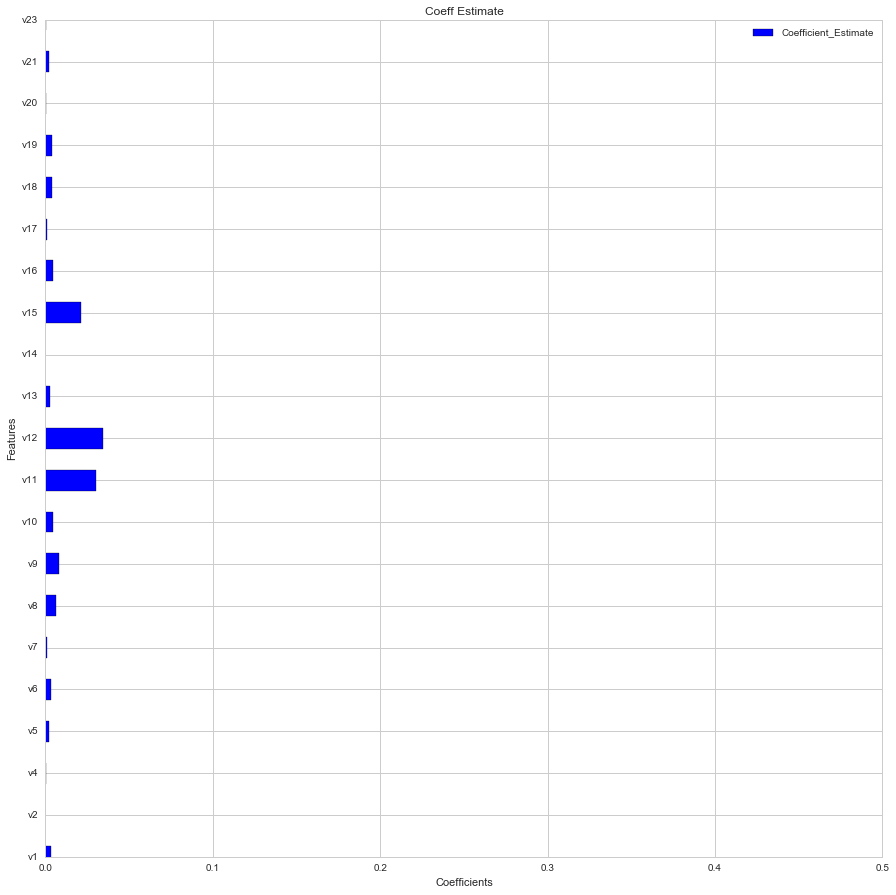

In [156]:
fig=coeff_df.plot(kind='barh',figsize=(15,15))
fig.set_ylim(0,20)
fig.set_title('Coeff Estimate')
fig.set_yticklabels(coeff_df.Features)
fig.set_ylabel('Features')
fig.set_xlabel('Coefficients')

In [157]:
print len(submission)
print len(prob)

114393
114393


In [159]:
#Predicted Probabilities
submission = pd.DataFrame()
submission["ID"]            = bnp_test["ID"]
submission['PredictedProb'] = prob

submission.to_csv('../processed_data/bnp.csv', index=False)